Notebook to plot the TurnSalmon results

In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt

# Code paths
import sys
sys.path.append(os.path.split(os.getcwd())[0] + '\\helpers')
sys.path.append(os.path.split(os.getcwd())[0] + '\\associator\\CompTrack')

from file_utils import read_config, load_txt_data_for_eval_SintefCam

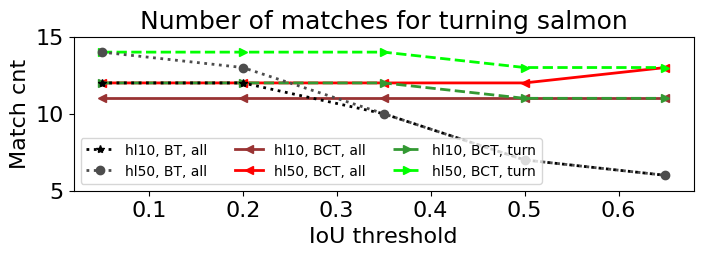

In [ ]:
salmon_tracking_roots = [r'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\benchmark\\model_5\\all', r'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\benchmark\\model_5\\turn']
fig, ax = plt.subplots(1,1,figsize = (8,2))

for salmon_tracking_root, rootnum in zip(salmon_tracking_roots, range(len(salmon_tracking_roots))):
    for associator in ['BoostTrack', 'BoostCompTrack']:
        # Only  plot BoostTrack once (since it is identical for all rootnums)
        if rootnum > 0 and associator == 'BoostTrack':
            continue 
        for hl in os.listdir(salmon_tracking_root + '\\associator\\' + associator + '\\output\\'):
            lab = ''
            plot_dict = {k:[] for k in ['T', 'S', 'TO', 'O', 'BO']}
            for analysis_num in os.listdir(salmon_tracking_root + '\\associator\\' + associator + '\\output\\' + hl):
                config = read_config(salmon_tracking_root + '\\associator\\' + associator + '\\output\\' + hl + '\\' + analysis_num + '\\config.yml')
                analysis_path = salmon_tracking_root + '\\associator\\' + associator + '\\output\\' + hl + '\\' + analysis_num
                results_data_path = analysis_path + '\\MOT_results_evaluated.txt'
                res = load_txt_data_for_eval_SintefCam(results_data_path)
                
                # Only evaluate turning salmon
                # Note that "switch" and "transfer" lables are not necessarily correct, as only the two endpoints of the track are evaluated.
                for t in ['T']:
                    plot_dict[t].append([config['trk_det_min_iou_threshold'], res[np.bitwise_and(res[:,11]==t, res[:,-1]=='match')].shape[0]])

            for k in plot_dict.keys():
                if len(plot_dict[k])==0:
                    continue
                temp = np.array(plot_dict[k])
                plot_type = '-o'
                if associator == 'BoostTrack':
                    plot_type = ':'
                    if hl == 'max_hidden_length_10':
                        marker_type = '*'
                        c = np.array([0,0,0])
                    else:
                        marker_type = 'o'
                        c = np.array([0.3,0.3,0.3])
                    
                    zorder = 2
                    
                    lab = lab + 'BT, ' + os.path.basename(salmon_tracking_root)
                if associator == 'BoostCompTrack':
                    plot_type = '--'
                    marker_type = '>'
                    zorder = 1
                    if rootnum == 0:
                        c = np.array([1,0,0])
                        plot_type = '-'
                        marker_type = '<'
                        if hl == 'max_hidden_length_10':
                            c = np.array([0.6,0.2,0.2])
                    elif rootnum == 1:
                        c = np.array([0,1,0])
                        if hl == 'max_hidden_length_10':
                            c = np.array([0.2,0.6,0.2])
                    lab = lab + 'BCT, ' + os.path.basename(salmon_tracking_root)
                if associator == 'CompTrack':
                    plot_type = '--'
                if hl == 'max_hidden_length_10':
                    ax.plot(temp[:,0], temp[:,1], plot_type, marker = marker_type, c = c, linewidth = 2, label = 'hl10, ' + lab, zorder = zorder)
                elif hl == 'max_hidden_length_50':
                    ax.plot(temp[:,0], temp[:,1], plot_type, marker = marker_type, c = c, linewidth = 2, label = 'hl50, ' + lab, zorder = zorder)

ax.set_title('Number of matches for turning salmon', fontsize = 18)
ax.set_ylabel('Match cnt', fontsize = 16)
ax.set_xlabel('IoU threshold', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim([5,15])
ax.legend(fontsize = 10, ncol = 3)
#ax.legend()
                
